In [6]:
import os,sys
Nthread = 1
os.environ["OMP_NUM_THREADS"] = str(Nthread) # export OMP_NUM_THREADS=1
os.environ["OPENBLAS_NUM_THREADS"] = str(Nthread) # export OPENBLAS_NUM_THREADS=1
os.environ["MKL_NUM_THREADS"] = str(Nthread) # export MKL_NUM_THREADS=1
os.environ["VECLIB_MAXIMUM_THREADS"] = str(Nthread) # export VECLIB_MAXIMUM_THREADS=1
os.environ["NUMEXPR_NUM_THREADS"] = str(Nthread) # export NUMEXPR_NUM_THREADS=1

import autograd.numpy as np
from autograd import grad
import nlopt, numpy as npf
import matplotlib.pyplot as plt

rpath = '/home/wljin/MyLocal/RCWA/'
sys.path.append(rpath)

import use_autograd
use_autograd.use = 1
import rcwa
from utils import test_grad

In [7]:
nG = 101 # truncation order, the actual truncation order might differ from this
# frequency and angles
freq = 1.
theta = 0.
phi = 0.
# lattice vector
Lx = .5
Ly = .5
L1 = [Lx,0.]
L2 = [0.,Ly]

# now consider 4 layers: vacuum + patterned + patterned + vacuum
epsuniform0 = 1. # dielectric for layer 1 (uniform)
epsuniformN = 1.  # dielectric for layer N (uniform)

thick0 = 1. # thickness for vacuum layer 1
thickN = 1.  # thickness for vacuum layer N

###########.  patterned for optimization
# all patterned layers below have the same griding structure: Nx*Ny
Nx = 100
Ny = 100
Nlayer = 2  # number of patterned layers for optimization
ndof = Nx*Ny*Nlayer # total number of DOFs

# thickness
thickness = [0.5,0.5]
epsbkg = [1., 1.]
epsdiff = [3.,5.]

In [10]:
Qabs = 100.
def fun_reflection_dof(dof):
    freqcmp = freq*(1+1j/2/Qabs)
    obj = rcwa.RCWA_obj(nG,L1,L2,freqcmp,theta,phi,verbose=0)
    # add all layers in order
    obj.Add_LayerUniform(thick0,epsuniform0)
    for i in range(Nlayer):
        obj.Add_LayerGrid(thickness[i],epsdiff[i],epsbkg[i],Nx,Ny)
    obj.Add_LayerUniform(thick0,epsuniformN)
    
    obj.Init_Setup(Gmethod=0)

    p_amp = 1.
    p_phase = 0.
    s_amp = 0.
    s_phase = 0.
    obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
    obj.GridLayer_getDOF(dof)
    R,_ = obj.RT_Solve(normalize=1)
    return R

dof = np.random.random(ndof)
fun = lambda dof: fun_reflection_dof(dof)
grad_fun = grad(fun)
test_grad(fun,grad_fun,dof,1e-4,0)

('Finite difference = ', 5.9644540417735925e-05, ', Auto = ', 5.964463289847037e-05)


In [13]:
Qabs = 100.
dof = np.random.random(ndof)
def fun_reflection_t(thickness):
    freqcmp = freq*(1+1j/2/Qabs)
    obj = rcwa.RCWA_obj(nG,L1,L2,freqcmp,theta,phi,verbose=0)
    # add all layers in order
    obj.Add_LayerUniform(thick0,epsuniform0)
    for i in range(Nlayer):
        obj.Add_LayerGrid(thickness[i],epsdiff[i],epsbkg[i],Nx,Ny)
    obj.Add_LayerUniform(thick0,epsuniformN)
    
    obj.Init_Setup(Gmethod=0)

    p_amp = 1.
    p_phase = 0.
    s_amp = 0.
    s_phase = 0.
    obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
    obj.GridLayer_getDOF(dof)
    R,_ = obj.RT_Solve(normalize=1)
    return R

thickness = np.random.random(Nlayer)
fun = lambda t: fun_reflection_t(t)
grad_fun = grad(fun)
test_grad(fun,grad_fun,dof,1e-4,1)

('Finite difference = ', 1.7405715894693723, ', Auto = ', 1.7405644127047015)


In [5]:
ctrl = 0
vec = []
def fun_reflection(dof,Qabs):
    freqcmp = freq*(1+1j/2/Qabs)
    obj = rcwa.RCWA_obj(nG,L1,L2,freqcmp,theta,phi,verbose=0)
    # add all layers in order
    obj.Add_LayerUniform(thick0,epsuniform0)
    for i in range(Nlayer):
        obj.Add_LayerGrid(thickness[i],epsdiff[i],epsbkg[i],Nx,Ny)
    obj.Add_LayerUniform(thick0,epsuniformN)
    
    obj.Init_Setup(Gmethod=0)

    p_amp = 1.
    p_phase = 0.
    s_amp = 0.
    s_phase = 0.
    obj.MakeExcitationPlanewave(p_amp,p_phase,s_amp,s_phase,order = 0)
    obj.GridLayer_getDOF(dof)
    R,_ = obj.RT_Solve(normalize=1)


    if 'autograd' not in str(type(R)):
        global ctrl
        global vec
        vec = npf.copy(dof)
        
        print(ctrl,R)
        if npf.mod(ctrl,10)==0:
            for i in range(Nlayer):
                plt.figure();
                plt.imshow(np.reshape(dof[i*Nx*Ny:(i+1)*Nx*Ny],(Nx,Ny)))
                plt.colorbar()
                plt.show()
            
        ctrl +=1
    return R

0 0.0837449137911443


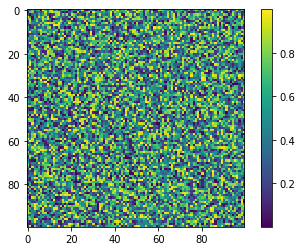

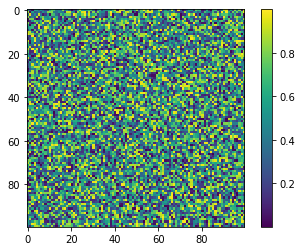

1 0.08374780282484807
2 0.08377667474865219
3 0.08418914472970299
4 0.08953439570019751
5 0.11620086155688567
6 0.08771018602195434
7 0.12565366431622235
8 0.12374793647216813
9 0.1271706628984218
10 0.12626511832639647


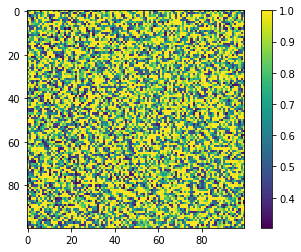

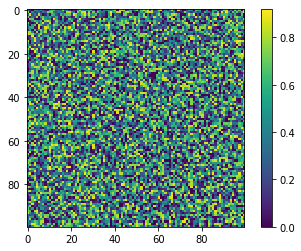

11 0.12725279251715277
12 0.11792014922302962
13 0.127207518721045
14 0.12727035224286437
15 0.12737409989118648
16 0.11554551307931148
17 0.12732659892187256
18 0.12744213783675676
19 0.12330443069652956
20 0.12754899933122743


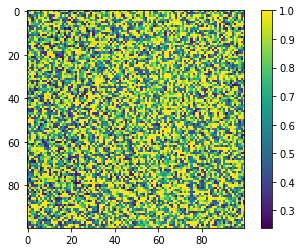

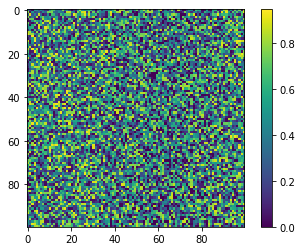

21 0.12430249035228146
22 0.12777490053813198
23 0.1279543186296299
24 0.1293703674914255
25 0.13518872330357382
26 0.06587284462082144
27 0.08997476821503439
28 0.14192623241675864
29 0.15578086423977675
30 0.12888644834142712


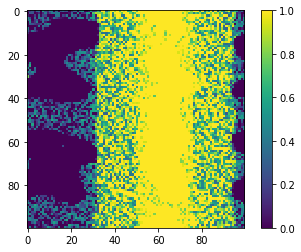

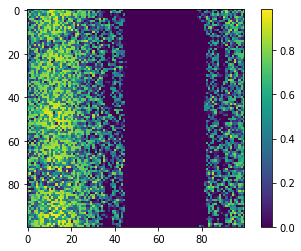

31 0.16442949721986444
32 0.1689837223252187
33 0.17447521615152656
34 0.18756524947205153
35 0.1914436776252004
36 0.19893157194929492
37 0.2053774063031406
38 0.20861412991671474
39 0.21085544494220487
40 0.2127644073445309


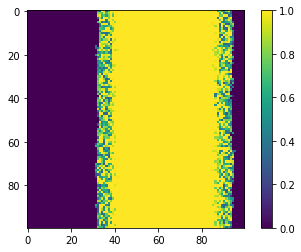

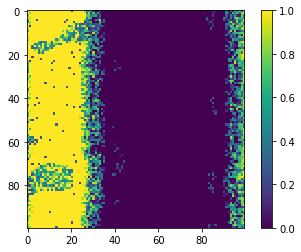

41 0.21460900232426017
42 0.21614590109558496
43 0.21737237771358986
44 0.21838251338824738
45 0.21902438066776864
46 0.21950509953597477
47 0.21990075880188634
48 0.2202160686752611
49 0.2204224656658873
50 0.22057039426996036


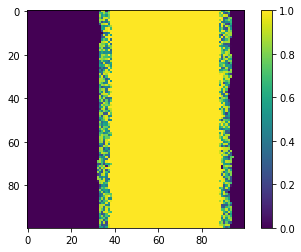

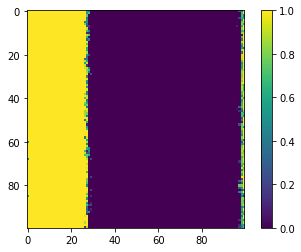

51 0.22068170787511837
52 0.22079595545005973
53 0.22093511578608446
54 0.22108545300386195
55 0.22122819329019705
56 0.2213495611230973
57 0.22144037819196088
58 0.22149534442484892
59 0.221528262237827
60 0.22155287466537252


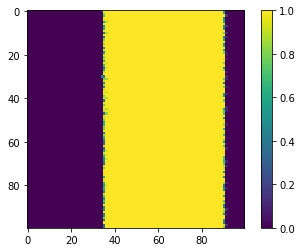

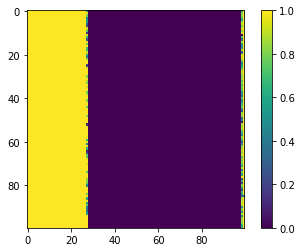

61 0.22156245049643755
62 0.22156523078210838
63 0.2215668089720059
64 0.22156854699361594
65 0.22157085530947151
66 0.22157346883972437
67 0.22157609882728932
68 0.22157830616999025
69 0.22155291051774614
70 0.22158007195742382


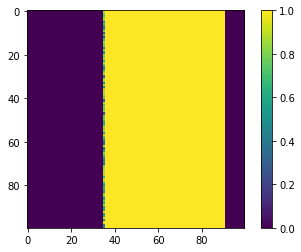

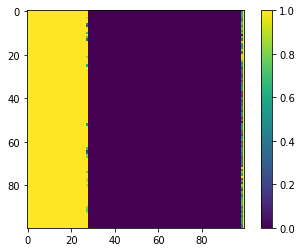

71 0.2215830287396264
72 0.22158433431585275
73 0.22158565160129026
74 0.22158686110067938
75 0.2215882736965612
76 0.2215883960290731
77 0.2215880340565177
78 0.22158846620945513
79 0.22158851097252869
80 0.22158815114180974


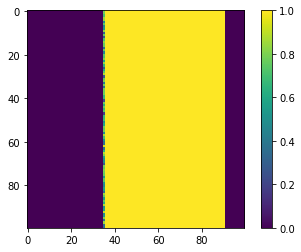

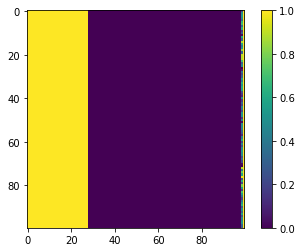

81 0.22158853084474495
82 0.2215885887427453
83 0.2215884584807327
84 0.22158860704841654
85 0.22158857265022494
86 0.22158862869215354
87 0.22158863727482941
88 0.22158858010758264
89 0.22158873160776468
90 0.2215887878181105


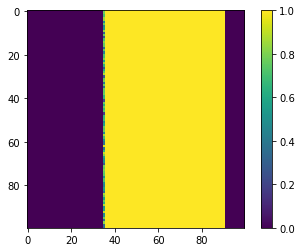

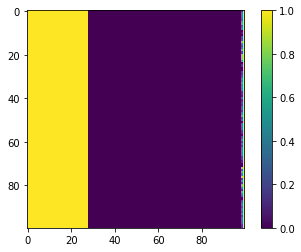

91 0.22158872230100238
92 0.22158880819140625
93 0.22158881764877966
94 0.2215886982154405
95 0.22158886643375014
96 0.22158889609879537
97 0.22158877525571052
98 0.22158890016769386
99 0.22158891358381827


In [4]:
Qabs = 20.
fun = lambda dof: fun_reflection(dof,Qabs)
grad_fun = grad(fun)
def fun_nlopt(dof,gradn):
    gradn[:] = grad_fun(dof)
    return fun(dof)

init = np.random.random(ndof)
lb=np.zeros(ndof,dtype=float)
ub=np.ones(ndof,dtype=float)

opt = nlopt.opt(nlopt.LD_MMA, ndof)
opt.set_lower_bounds(lb)
opt.set_upper_bounds(ub)

opt.set_xtol_rel(1e-5)
opt.set_maxeval(100)

opt.set_max_objective(fun_nlopt)
x = opt.optimize(init)